In [63]:
import nltk 
import pandas as pd  
import  numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
# from sklearn.sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.utils import pad_sequences 

In [2]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
test_data = open('data/test.txt').readlines()
train_data = open('data/train.txt').readlines()
val_data = open('data/val.txt').readlines()


In [4]:
len(test_data)

2000

In [5]:
len(train_data)

16000

In [6]:
len(val_data)

2000

In [7]:
ls1 = ['mohan','rohan']
ls2 = ['rohit','kapoor'] 
ls1 + ls2 

['mohan', 'rohan', 'rohit', 'kapoor']

In [8]:
full_data = train_data + test_data + val_data 

In [9]:
len(full_data) 

20000

In [10]:

full_data[22].split(';')[1][:-1]

'joy'

In [11]:
x = []
y = []
for message in full_data: 
    separated_data = message.split(';')
    if len(separated_data) == 2: 
        x.append(separated_data[0])
        y.append(separated_data[1][:-1])
        
        

In [12]:
len(x),len(y)

(20000, 20000)

In [13]:
label_classes = set(y)
label_classes

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

In [14]:
df = pd.DataFrame({"messages":x,"labels":y})
df.head()

messages   labels
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

In [15]:
df.to_csv('message.csv',index=False)

In [16]:
labels = list(df['labels'].value_counts().keys())
labels

['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']

In [17]:
value = list(df['labels'].value_counts().values )
value

[6761, 5797, 2709, 2373, 1641, 719]

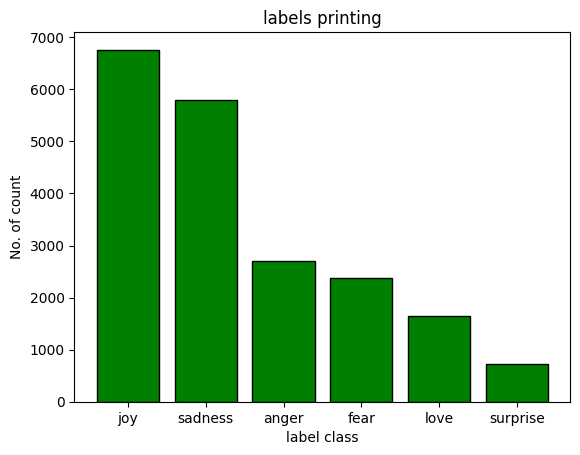

In [18]:
plt.bar(labels,value,color='green',ec='black') 
plt.title("labels printing")
plt.xlabel("label class")
plt.ylabel('No. of count')
plt.show()

In [20]:

## text cleaning function 
def text_cleaning(messages,stemming):
    clean_data = []
    for message in messages: 
        message = message.lower()
        ls_of_words = nltk.word_tokenize(message)  # 
        word_without_stop_words = [word for word in ls_of_words if word not in stopwords.words('english')] # removing stopwords 
        ls_of_stemmed_words = [stemming.stem(word) for word in word_without_stop_words]   # stemming
        clean_message = " ".join(ls_of_stemmed_words) 
        clean_data.append(clean_message)
    return clean_data 

stemming =  PorterStemmer()
clean_data = text_cleaning(messages=x,stemming=stemming)  # calling

In [31]:
x[1] 

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [32]:
clean_data[1]

'go feel hopeless damn hope around someon care awak'

In [24]:
# play, player , played , playing , players 

# base words  
# playe

x[0]

'i didnt feel humiliated'

In [38]:
tokenizer_obj = Tokenizer()

In [39]:
tokenizer_obj.fit_on_texts(clean_data)

In [49]:
# tokenizer_obj.word_index  
clean_data[0]  

'didnt feel humili'

In [42]:
sequence = tokenizer_obj.texts_to_sequences(clean_data)

In [53]:
len_of_seq = []
for mess  in sequence: 
    len_of_seq.append(len(mess)) 
print("maximum length : ", max(len_of_seq))

maximum length :  35


In [55]:
sequences = pad_sequences(sequences=sequence,padding='post',maxlen=35,)

In [56]:
sequences     ## x  

array([[  60,    1,  521, ...,    0,    0,    0],
       [   9,    1,  418, ...,    0,    0,    0],
       [   3, 1229,  430, ...,    0,    0,    0],
       ...,
       [   1,  193,  156, ...,    0,    0,    0],
       [ 327,    1,  174, ...,    0,    0,    0],
       [   1,    2,  915, ...,    0,    0,    0]])

In [64]:
maping_dict = {'anger':0, 'fear':1, 'joy':2, 'love':3, 'sadness':4, 'surprise':5}
labels = []
for label in y:
    labels.append(maping_dict[label])
labels = np.array(labels)    

In [66]:
labels 

array([4, 4, 0, ..., 2, 2, 2])

In [69]:
# sequences   #  <==  x 
# labels      #  <=== y  
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sequences,labels,test_size=0.2)

In [71]:
## algorithms  train   
# Natural language processing   
# artificial neural network   ==> RNN (Recurrent neural network) 

## RNN define 

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM   # long short term memory 

model = Sequential([LSTM(units=64,input_shape=(35,1),return_sequences=True),  # hidden layer 1
                   LSTM(units=32), # hidden layer 2 
                   Dense(units=6,activation='softmax')])  # output layer 

model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 35, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,510 (115.27 KB)

 Trainable params: 29,510 (115.27 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.3423 - loss: 1.5716 - val_accuracy: 0.3252 - val_loss: 1.5897
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.3415 - loss: 1.5733 - val_accuracy: 0.3288 - val_loss: 1.5874
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.3434 - loss: 1.5696 - val_accuracy: 0.3318 - val_loss: 1.5865
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.3462 - loss: 1.5705 - val_accuracy: 0.3293 - val_loss: 1.5865
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.3376 - loss: 1.5705 - val_accuracy: 0.3252 - val_loss: 1.5931
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.3414 - loss: 1.5747 - val_accuracy: 0.3318 - val_loss: 1.5876
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.3449 - loss: 1.5701 - val_accuracy: 0.3392 - val_loss: 1.5848
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.3476 - loss: 1.5734 - 

In [75]:
## prediction 
pred = model.predict(x_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [76]:
pred 

array([[0.0880723 , 0.08574983, 0.44362584, 0.09560161, 0.22906606,
        0.05788438],
       [0.13714387, 0.1480082 , 0.29848728, 0.0617166 , 0.32086125,
        0.03378282],
       [0.13405554, 0.14720011, 0.26691875, 0.06407972, 0.353924  ,
        0.03382188],
       ...,
       [0.10095989, 0.11280041, 0.4005047 , 0.08403582, 0.24432063,
        0.05737852],
       [0.144007  , 0.11770254, 0.33688745, 0.0601606 , 0.30910566,
        0.03213679],
       [0.08756766, 0.07607393, 0.40245786, 0.08029085, 0.29419515,
        0.05941458]], dtype=float32)

In [78]:
prediction = np.argmax(pred,axis=1)   # highest probability 

In [80]:
prediction

array([2, 4, 4, ..., 2, 2, 2], dtype=int64)

In [82]:
y_test.shape , prediction.shape 

((4000,), (4000,))

In [85]:
y_test[:10]  # actual 10 values 

array([2, 2, 4, 2, 2, 2, 2, 4, 2, 4])

In [86]:
prediction[:10]

array([2, 4, 4, 4, 4, 2, 4, 2, 2, 2], dtype=int64)

In [87]:
maping_dict

{'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'sadness': 4, 'surprise': 5}